In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_52766_G')

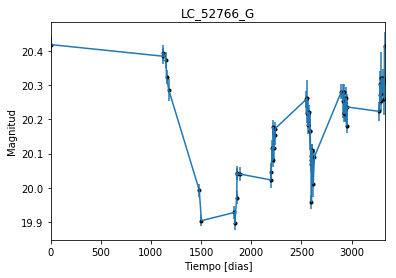

In [2]:
data = np.genfromtxt('LC_52766_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_52766_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

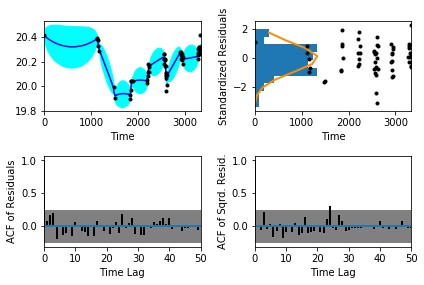

In [5]:
sample.assess_fit()

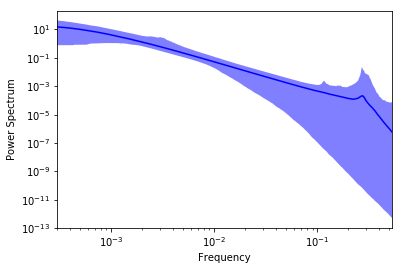

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_52766_G')

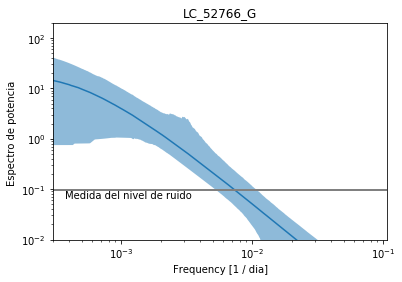

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_52766_G')

Text(0.5,1,'Prediccion , valor esperado LC_52766_G')

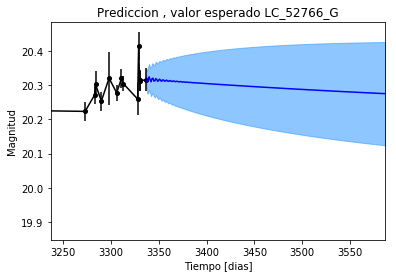

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_52766_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_52766_G')

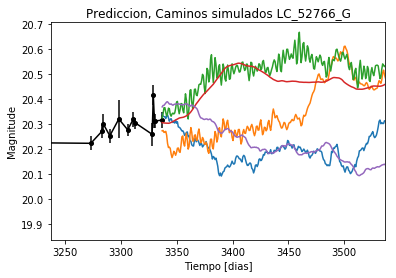

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_52766_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_52766_G')

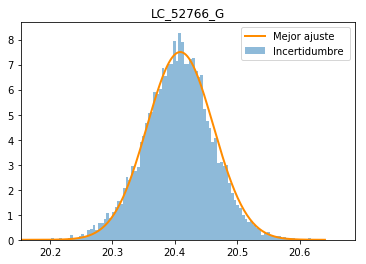

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_52766_G')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_G')

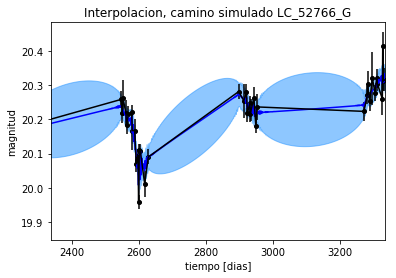

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_G')

Text(0.5,1,'Interpolacion, camino simulado LC_52766_G')

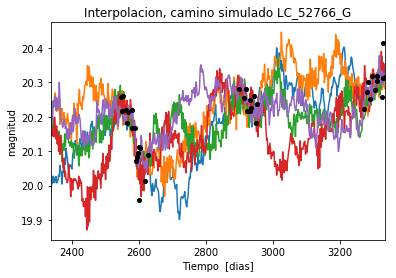

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_52766_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1101.29137791
Median: 0.00936446267007
Standard deviation: 0.118608135845
68% credibility interval: [ 0.00129426  0.03355683]
95% credibility interval: [ 0.00045626  0.39556526]
99% credibility interval: [  3.11468835e-04   8.99470146e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 408.308898302
Median: 0.0079463384454
Standard deviation: 0.0587068658264
68% credibility interval: [ 0.0010491   0.02526554]
95% credibility interval: [ 0.00037258  0.11456755]
99% credibility interval: [  3.11468835e-04   3.69828722e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 285.598539584
Median: 0.210538385523
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 183.033300101
Median: 114.224625789
Standard deviation: 2.93438463233
68% credibility interval: [ 110.27082689  116.46577316]
95% credibility interval: [ 107.10444009  117.5797617 ]
99% credibility interval: [ 105.0823489   117.98821211]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 411.70759337
Median: 1.68375743285
Standard deviation: 2.05813057092
68% credibility interval: [ 0.32317083  4.50176307]
95% credibility interval: [ 0.08337667  6.82423336]
99% credibility interval: [ 0.04100741  9.09176589]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 142.416862516
Median: 3.72911413065
Standard deviation: 9.27577646841
68% credibility interval: [  2.38441035  19.20504667]
95% credibility interval: [  0.12851876  31

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.031089
Median: 1.26242637205e-27
Standard deviation: 1.31725054176e+38
68% credibility interval: [  1.36083749e-68   3.79220120e-09]
95% credibility interval: [  5.39654017e-103   1.19670194e+026]
99% credibility interval: [  1.30891155e-106   3.34724370e+031]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1192.86362346
Median: 20.2087342296
Standard deviation: 0.0894146988845
68% credibility interval: [ 20.13665405  20.29842418]
95% credibility interval: [ 20.0587295   20.41403315]
99% credibility interval: [ 19.96879128  20.53017715]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 198.998793257
Median: 0.284956571066
Standard deviation: 0.228284052687
68% credibility interval: [ 0.15362959  0.69115656]
95% credibility interval: [ 0.          0.87653171]
99% credibility interval: [ 0.        1.015519]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 198.998793257
Median: 0.284956571066
Standard deviation: 0.228284052687
68% credibility interval: [ 0.15362959  0.69115656]
95% credibility interval: [ 0.          0.87653171]
99% credibility interval: [ 0.        1.015519]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 363.061456077
Median: 0.0
Standard deviation: 0.000521848184372
68% credibility 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 183.033300101
Median: 114.224625789
Standard deviation: 2.93438463233
68% credibility interval: [ 110.27082689  116.46577316]
95% credibility interval: [ 107.10444009  117.5797617 ]
99% credibility interval: [ 105.0823489   117.98821211]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 574.496766441
Median: 0.0321107213939
Standard deviation: 0.0211521887474
68% credibility interval: [ 0.0210988   0.04962512]
95% credibility interval: [ 0.01395314  0.08216093]
99% credibility interval: [ 0.01137104  0.12641079]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 149.926986352
Median: 1.08968187276
Standard deviation: 0.265879485993
68% credibility interval: [ 0.88463017  1.41620547]
95% credibility interval: [ 0.74806601  1.76418813]
99% credibility interval: [ 0.68333338  1.92922293]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 265.181250553
Median: 0.0618574827414
Standard deviation: 0.375655548384
68% credibility interval: [ 0.00276766  0.28904165]
95% credibility interval: [  4.43494436e-28   1.38073585e+00]
99% credibility interval: [  4.10511161e-33   2.16884613e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1101.29137791
Median: (-0.0588386542582-1.79611464756j)
Standard deviation: 1.61639748806
68% credibility interval: [-0.21084379-1.53984475j -0.00813204-4.37263876j]
95% credibility interval: [-2.48540981+0.j         -0.00286677-0.14708166j]
99% credibility interval: [ -5.65153761e+00-6.01980043j  -1.95701641e-03-1.70023297j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 408.308898302
Median: (-0.049928316966+1.92043495293j)
Standard deviation: 1.48102161351
68% credibility interval: [-0.15874809+1.0215261j  -0.00659167+4.46649192j]
95% credibility interval: [-0.71984912+0.57264749j -0.00234101+0.j        ]
99% credibility interval: [ -2.32370239e+00+1.17960597j  -1.95701641e-03+1.70023297j]
Posterior summary for par